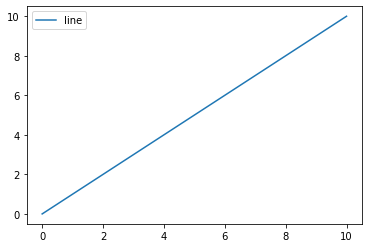

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,10,100)
plt.plot(x,x,label='line')
plt.legend()
plt.show()


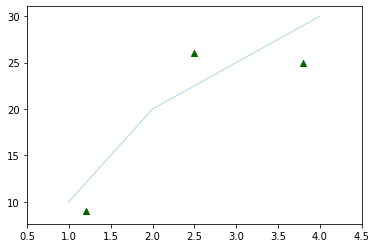

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=1)
ax.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], color='darkgreen', marker='^')
ax.set_xlim(0.5, 4.5)
plt.show()

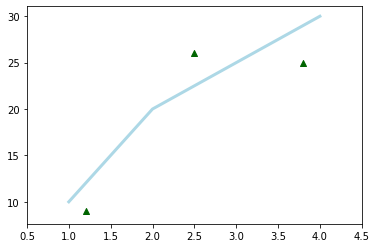

In [9]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
plt.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], color='darkgreen', marker='^')
plt.xlim(0.5, 4.5)
plt.show()

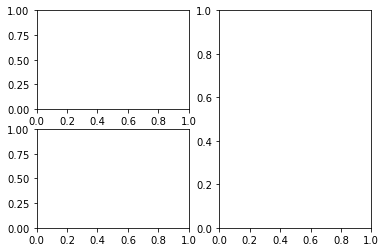

In [11]:
fig = plt.figure()
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
# spans two rows:
ax3 = fig.add_subplot(gs[:, 1])
plt.show()

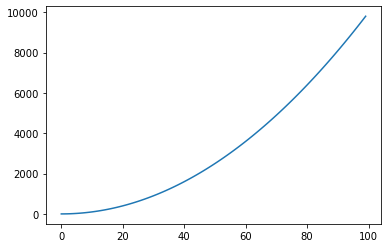

In [17]:

x = np.arange(100)
y = [v*v for v in x]
plt.plot(x,y,label='y=x^2')
plt.show()

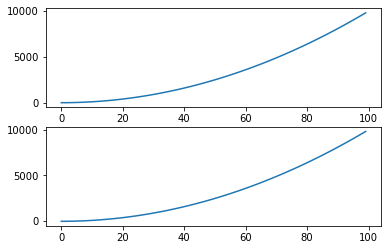

In [21]:
fig = plt.figure()
first = fig.add_subplot(2,1,1)
second = fig.add_subplot(2,1,2)


first.plot(x,y)
second.plot(x,y)

plt.show()

High      Low     Open    Close     Volume     Adj Close
Date                                                                   
2015-01-02  59500.0  58700.0  59000.0  58800.0   281751.0  56952.015625
2015-01-05  58900.0  57500.0  58500.0  58400.0   379003.0  56564.585938
2015-01-06  60500.0  57700.0  58100.0  60100.0   799629.0  58211.156250
2015-01-07  60600.0  59300.0  59500.0  60000.0   703542.0  58114.304688
2015-01-08  63000.0  60300.0  60300.0  62200.0  1404924.0  60245.160156
...             ...      ...      ...      ...        ...           ...
2019-12-23  72600.0  71900.0  72600.0  72500.0   257344.0  72500.000000
2019-12-24  72700.0  71900.0  72500.0  71900.0   220741.0  71900.000000
2019-12-26  72200.0  71200.0  72000.0  71300.0   372424.0  71300.000000
2019-12-27  72100.0  71100.0  71300.0  71800.0   498244.0  71800.000000
2019-12-30  72200.0  71600.0  71800.0  72100.0   283273.0  72100.000000

[1155 rows x 6 columns]
DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06

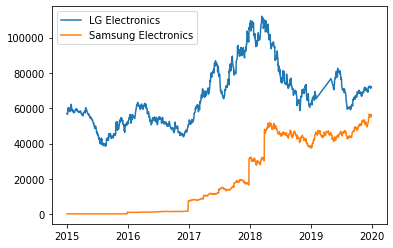

In [35]:
import pandas_datareader.data as web

lg = web.DataReader("066570.KS", "yahoo")
samsung = web.DataReader("005930.KS", "yahoo")

print(lg)
print(lg.index)
print(lg['Adj Close'])

plt.plot(lg['Adj Close'], label='LG Electronics')
plt.plot(samsung['Adj Close'], label='Samsung Electronics')

plt.legend()
plt.show()

Date
2019-12-16    72200
2019-12-17    72200
2019-12-18    72400
2019-12-19    72200
2019-12-20    72700
2019-12-23    72600
2019-12-24    72500
2019-12-26    72000
2019-12-27    71300
2019-12-30    71800
Name: Open, dtype: int64
[0, 5, 9]


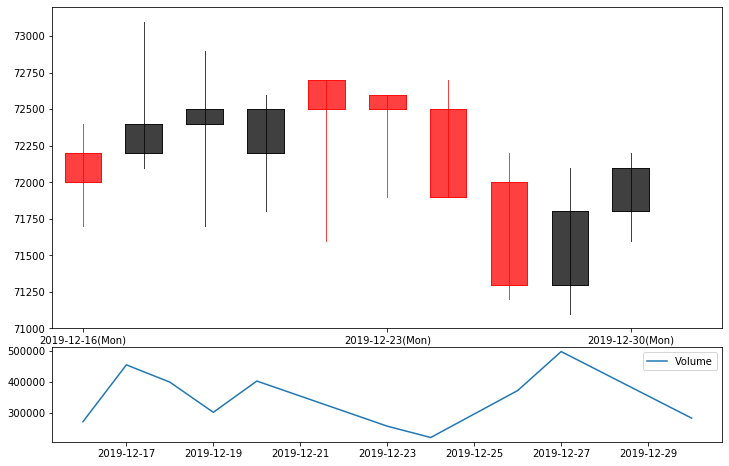

In [117]:
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from mpl_finance import candlestick2_ohlc
import matplotlib.ticker as ticker
import datetime

### plt.subplot2grid를 사용하면 쉽게 그릴 수 있다.

start = datetime.datetime(2019,12,15)
end = datetime.datetime(2019,12,31)
lg = web.DataReader("066570.KS", "yahoo", start, end)

fig = plt.figure(figsize=(12, 8))
top = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan=4)
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)

candlestick2_ohlc(top,lg['Open'],lg['High'],lg['Low'],lg['Close'],width=0.6)

day_list = []
name_list = []
for i, day in enumerate(lg.index):
    if day.dayofweek == 0:
        day_list.append(i)
        name_list.append(day.strftime('%Y-%m-%d') + '(Mon)')
print(day_list)
top.xaxis.set_major_locator(ticker.FixedLocator(day_list))
top.xaxis.set_major_formatter(ticker.FixedFormatter(name_list))

#top.plot(lg['Adj Close'], label='Adj Close')
#top.legend()
bottom.plot(lg['Volume'], label='Volume')
bottom.legend()

plt.show()


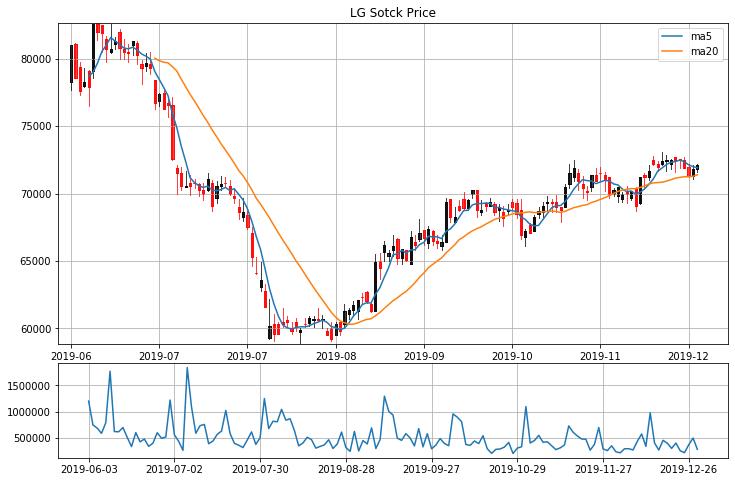

In [12]:
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from mpl_finance import candlestick2_ohlc
import matplotlib.ticker as ticker
import datetime

start = datetime.datetime(2019,6,1)
end = datetime.datetime(2019,12,31)
lg = web.DataReader("066570.KS", "yahoo", start, end)
index = lg.index.astype('str')

ma5 = lg['Close'].rolling(window=5).mean()  
ma20 = lg['Close'].rolling(window=20).mean()

fig = plt.figure(figsize=(12, 8))
top = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan=4)
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)

def mydate(x,pos):
    try:
        return index[int(x-0.5)][:7]
    except IndexError:
        return ''

top.xaxis.set_major_locator(ticker.MaxNLocator(10))
top.xaxis.set_major_formatter(ticker.FuncFormatter(mydate))
candlestick2_ohlc(top,lg['Open'],lg['High'],lg['Low'],lg['Close'],width=0.5)
top.plot(index,ma5, label='ma5')
top.plot(index,ma20, label='ma20')
top.legend()
top.set_title('LG Sotck Price')

bottom.plot(index, lg['Volume'])
bottom.xaxis.set_major_locator(ticker.MaxNLocator(10))

top.grid()
bottom.grid()

plt.show()

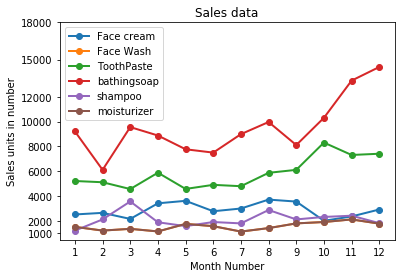

In [20]:
import pandas as pd
import matplotlib.pyplot as plt  

df = pd.read_csv('/Users/yeop/yeop/python/lab_matplotlib/sales_data.csv')
monthList  = df ['month_number'].tolist()
facecream  = df ['facecream'].tolist()
facewash   = df ['facewash'].tolist()
toothpaste = df ['toothpaste'].tolist()
bathingsoap   = df ['bathingsoap'].tolist()
shampoo = df ['shampoo'].tolist()
moisturizer = df ['moisturizer'].tolist()

#plt.plot(monthList, facecream,   label = 'Face cream', marker='o', linewidth=2)
plt.plot(df['month_number'], df['facecream'], label='Face cream', marker='o', linewidth=2)
plt.plot(monthList, facewash,   label = 'Face Wash',  marker='o', linewidth=2)
plt.plot(monthList, toothpaste, label = 'ToothPaste', marker='o', linewidth=2)
plt.plot(monthList, bathingsoap, label = 'bathingsoap', marker='o', linewidth=2)
plt.plot(monthList, shampoo, label = 'shampoo', marker='o', linewidth=2)
plt.plot(monthList, moisturizer, label = 'moisturizer', marker='o', linewidth=2)


plt.xlabel('Month Number')
plt.ylabel('Sales units in number')
plt.legend(loc='upper left')
plt.xticks(monthList)
plt.yticks([1000, 2000, 4000, 6000, 8000, 10000, 12000, 15000, 18000])
plt.title('Sales data')

plt.show()


In [34]:
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np

df = pd.read_csv('/Users/yeop/yeop/python/lab_matplotlib/ratings.csv')


df = np.array(df)
a = df[...,1]

means = {}
for i in np.unique(a):
    tmp = df[np.where(df[...,1] == i)]
    means[i] = np.mean(tmp[...,2])


for i in means:
    if(means[i] > 4):
        print("영화 : %d, 평점 : %.2f"%(i,means[i]))


, 평점 : 5.00
영화 : 3941, 평점 : 5.00
영화 : 3942, 평점 : 5.00
영화 : 3951, 평점 : 5.00
영화 : 3972, 평점 : 4.12
영화 : 3983, 평점 : 4.17
영화 : 4011, 평점 : 4.16
영화 : 4021, 평점 : 4.30
영화 : 4077, 평점 : 4.50
영화 : 4079, 평점 : 4.25
영화 : 4116, 평점 : 5.00
영화 : 4117, 평점 : 4.33
영화 : 4135, 평점 : 5.00
영화 : 4142, 평점 : 4.25
영화 : 4144, 평점 : 4.21
영화 : 4152, 평점 : 4.25
영화 : 4157, 평점 : 4.50
영화 : 4160, 평점 : 4.12
영화 : 4180, 평점 : 5.00
영화 : 4217, 평점 : 4.25
영화 : 4226, 평점 : 4.12
영화 : 4273, 평점 : 4.50
영화 : 4278, 평점 : 4.17
영화 : 4298, 평점 : 4.75
영화 : 4307, 평점 : 4.50
영화 : 4334, 평점 : 4.60
영화 : 4338, 평점 : 4.50
영화 : 4342, 평점 : 4.50
영화 : 4350, 평점 : 4.25
영화 : 4357, 평점 : 4.50
영화 : 4374, 평점 : 4.50
영화 : 4393, 평점 : 4.50
영화 : 4402, 평점 : 5.00
영화 : 4406, 평점 : 4.40
영화 : 4407, 평점 : 4.50
영화 : 4419, 평점 : 4.25
영화 : 4429, 평점 : 4.50
영화 : 4432, 평점 : 4.12
영화 : 4433, 평점 : 4.25
영화 : 4441, 평점 : 4.17
영화 : 4444, 평점 : 4.17
영화 : 4454, 평점 : 5.00
영화 : 4495, 평점 : 5.00
영화 : 4499, 평점 : 4.12
영화 : 4537, 평점 : 4.33
영화 : 4612, 평점 : 4.50
영화 : 4642, 평점 : 4.18
영화 : 4645, 평점 : 4.50
영